In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.express as px
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

import warnings
import os
import random

In [2]:
import warnings
from google.colab import files
uploaded = files.upload()


Saving CPI & factors dataset (training set).csv to CPI & factors dataset (training set).csv


In [3]:
training_data = pd.read_csv('CPI & factors dataset (training set).csv')
print(training_data.head())
print(training_data.tail())
data_describe = training_data.drop(columns=['Year'])
print(data_describe.describe())

   Year    Label   CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  1980  1980 01  77.8                6.9            875.9            39.00   
1  1980  1980 02  78.9                6.8            863.1            37.25   
2  1980  1980 03  80.1                6.6            785.8            37.00   
3  1980  1980 04  81.0                6.7            817.1            36.58   
4  1980  1980 05  81.8                7.1            850.9            37.05   

    PPI  
0  85.2  
1  86.9  
2  87.5  
3  87.8  
4  88.3  
     Year    Label      CPI  Unemployment rate  DJI Index Close  \
367  2010  2010 08  218.312                9.5         10014.72   
368  2010  2010 09  218.439                9.2         10788.05   
369  2010  2010 10  218.711                9.0         11118.49   
370  2010  2010 11  218.803                9.3         11006.02   
371  2010  2010 12  219.179                9.1         11577.51   

     Crude Oil Price    PPI  
367            75.83  184.9  
36

In [4]:
import warnings
from google.colab import files
uploaded = files.upload()


Saving CPI & factors dataset (validation set).csv to CPI & factors dataset (validation set).csv


In [5]:
validation_data = pd.read_csv('CPI & factors dataset (validation set).csv')
print(validation_data.head())
print(validation_data.tail())
data_describe = validation_data.drop(columns=['Year'])
print(data_describe.describe())

   Year    Label      CPI  Unemployment rate  DJI Index Close  \
0  2011  2011 01  220.223                9.8         11891.93   
1  2011  2011 02  221.309                9.5         12226.34   
2  2011  2011 03  223.467                9.2         12319.73   
3  2011  2011 04  224.906                8.7         12810.54   
4  2011  2011 05  225.964                8.7         12569.79   

   Crude Oil Price    PPI  
0            92.69  192.7  
1            97.91  195.8  
2           108.65  199.2  
3           116.24  203.1  
4           108.07  204.1  
    Year    Label      CPI  Unemployment rate  DJI Index Close  \
91  2018  2018 08  252.146                3.9         25964.82   
92  2018  2018 09  252.439                3.6         26458.31   
93  2018  2018 10  252.885                3.5         25115.76   
94  2018  2018 11  252.038                3.5         25538.46   
95  2018  2018 12  251.233                3.7         23327.46   

    Crude Oil Price    PPI  
91            7

In [6]:
import warnings
from google.colab import files
uploaded = files.upload()


Saving CPI & factors dataset (test set).csv to CPI & factors dataset (test set).csv


In [7]:
test_data = pd.read_csv('CPI & factors dataset (test set).csv')
print(test_data.head())
print(test_data.tail())
data_describe = test_data.drop(columns=['Year'])
print(data_describe.describe())

   Year    Label      CPI  Unemployment rate  DJI Index Close  \
0  2019  2019 01  251.712                4.4         24999.67   
1  2019  2019 02  252.776                4.1         25916.00   
2  2019  2019 03  254.202                3.9         25928.68   
3  2019  2019 04  255.548                3.3         26592.91   
4  2019  2019 05  256.092                3.4         24815.04   

   Crude Oil Price    PPI  
0            56.58  199.1  
1            61.13  199.2  
2            63.79  200.8  
3            68.58  202.1  
4            66.83  201.7  
    Year    Label      CPI  Unemployment rate  DJI Index Close  \
51  2023  2023 04  303.363                3.1         34101.46   
52  2023  2023 05  304.127                3.4         32908.27   
53  2023  2023 06  305.109                3.8         34407.60   
54  2023  2023 07  305.691                3.8         35559.53   
55  2023  2023 08  307.026                3.9         34721.91   

    Crude Oil Price      PPI  
51           

In [42]:
## First try moving average

# convert it to a datetime object
training_data['Label'] = pd.to_datetime(training_data['Label'])
test_data['Label'] = pd.to_datetime(test_data['Label'])
validation_data['Label'] = pd.to_datetime(validation_data['Label'])

# Calculate moving average for the 'CPI' column (change column name as needed)
window_size = 5  # Define your window size
training_data['Moving_Avg'] = training_data['CPI'].rolling(window=window_size).mean()
test_data['Moving_Avg'] = test_data['CPI'].rolling(window=window_size).mean()
validation_data['Moving_Avg'] = validation_data['CPI'].rolling(window=window_size).mean()

# Use the moving average as your prediction and compare it with the actual 'CPI' values
# Example: Calculate Root Mean Squared Error (RMSE)
test_rmse = np.sqrt(((test_data['CPI'] - test_data['Moving_Avg']) ** 2).mean())
validation_rmse = np.sqrt(((validation_data['CPI'] - validation_data['Moving_Avg']) ** 2).mean())


print("Test Set RMSE:", test_rmse)
print("Validation Set RMSE:", validation_rmse)

Test Set RMSE: 2.611187214511967
Validation Set RMSE: 1.1486495388252589


In [43]:
mask_test = ~np.isnan(test_data['Moving_Avg'])
y_test = test_data['CPI'][mask_test]
y_pred_test = test_data['Moving_Avg'][mask_test]

# Calculate Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
test_r2 = r2_score(y_test, y_pred_test)

# Calculate Adjusted R-squared
n_test = len(y_test)
p_test = 1

test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

print("Test Set MAE:", test_mae)
print("Test Set R-squared:", test_r2)
print("Test Set Adjusted R-squared:", test_adjusted_r2)

Test Set MAE: 2.092330769230771
Test Set R-squared: 0.9791253312889944
Test Set Adjusted R-squared: 0.9787078379147742


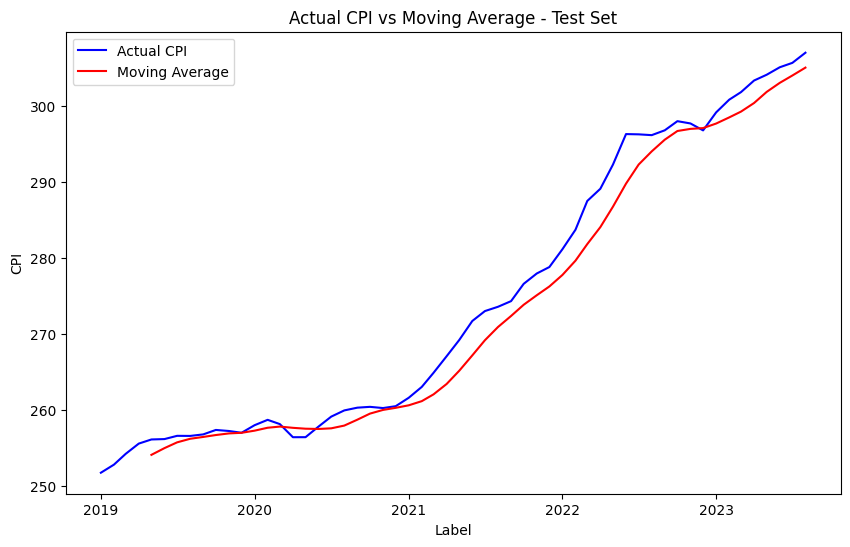

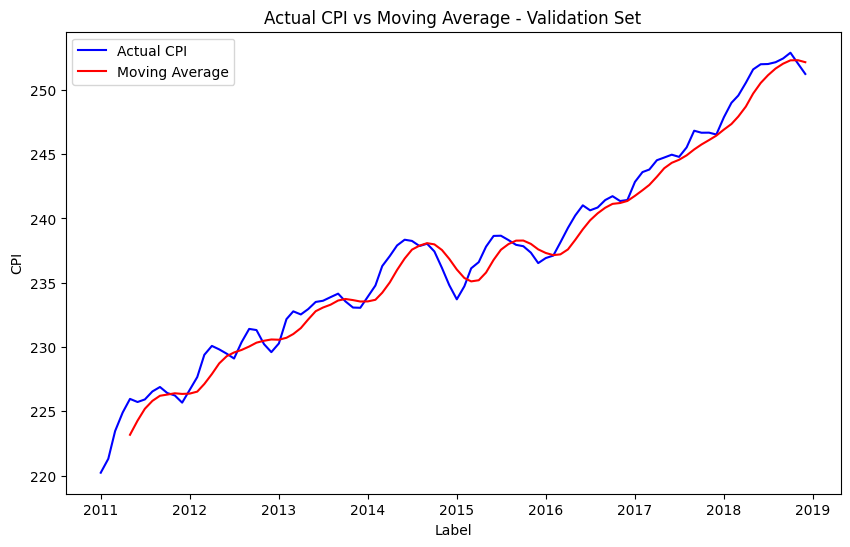

In [44]:
# Plotting CPI and Moving Average for Test Set
plt.figure(figsize=(10, 6))
plt.plot(test_data['Label'], test_data['CPI'], label='Actual CPI', color='blue')
plt.plot(test_data['Label'], test_data['Moving_Avg'], label='Moving Average', color='red')
plt.title('Actual CPI vs Moving Average - Test Set')
plt.xlabel('Label')
plt.ylabel('CPI')
plt.legend()
plt.show()

# Plotting CPI and Moving Average for Validation Set
plt.figure(figsize=(10, 6))
plt.plot(validation_data['Label'], validation_data['CPI'], label='Actual CPI', color='blue')
plt.plot(validation_data['Label'], validation_data['Moving_Avg'], label='Moving Average', color='red')
plt.title('Actual CPI vs Moving Average - Validation Set')
plt.xlabel('Label')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [45]:
# Define the single feature and the target variable for each dataset
feature = 'PPI'
target = 'CPI'

X_train = training_data[[feature]]
y_train = training_data[target]

X_val = validation_data[[feature]]
y_val = validation_data[target]

X_test = test_data[[feature]]
y_test = test_data[target]

# Create and fit a Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CPI using the model for validation and test sets
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

# Evaluate model performance using RMSE on validation and test sets
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Validation Set RMSE:", val_rmse)
print("Test Set RMSE:", test_rmse)

Validation Set RMSE: 20.43051012171889
Test Set RMSE: 31.506730440458618


In [46]:
# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# Calculate adjusted R-squared for the validation set
n_test = len(y_test)
p_test = X_test_poly.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

# Calculate RMSE for the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
# Calculate adjusted R-squared for the validation set
n_val = len(y_val)
p_val = X_val_poly.shape[1]
adj_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p_val - 1)

print("Test Set:")
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R-squared:", r2_test)

print("\nValidation Set:")
print("RMSE:", rmse_val)
print("MAE:", mae_val)
print("R-squared:", r2_val)
print("Adjusted R-squared:", adj_r2_val)

Test Set:
RMSE: 31.506730440458618
MAE: 24.314264909533843
R-squared: -1.9479126956616222

Validation Set:
RMSE: 20.43051012171889
MAE: 16.474342455115707
R-squared: -5.569834952913464
Adjusted R-squared: -5.784068701378033


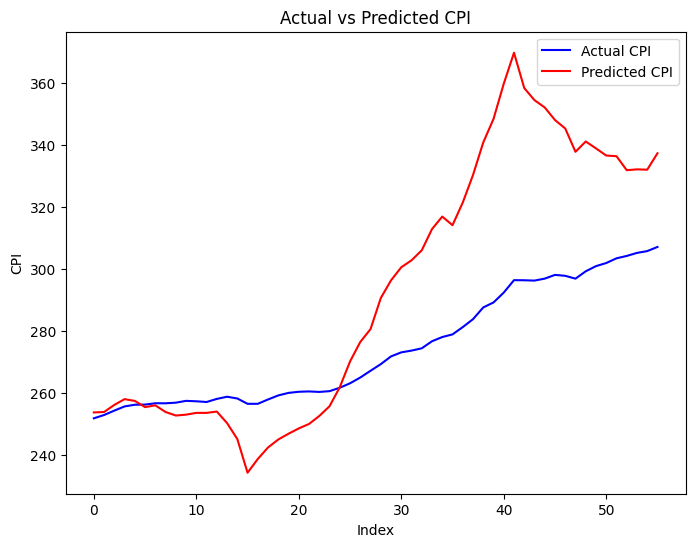

In [47]:
# Plotting the actual CPI values
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual CPI', color='blue')

# Plotting the predicted CPI values
plt.plot(y_pred_test, label='Predicted CPI', color='red')

plt.xlabel('Index')
plt.ylabel('CPI')
plt.title('Actual vs Predicted CPI')
plt.legend()
plt.show()

In [48]:
# Define the features (independent variables) and target (CPI)
features = ['Unemployment rate', 'DJI Index Close', 'Crude Oil Price', 'PPI']
target = 'CPI'

In [49]:
# Split the datasets into features and target variable
X_train = training_data[features]
y_train = training_data[target]

X_test = test_data[features]
y_test = test_data[target]

X_val = validation_data[features]
y_val = validation_data[target]

In [50]:
# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CPI using the model
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)

# Evaluate model performance using RMSE on the test and validation sets
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
validation_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

# Get the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_
# Print out the regression formula
print("Regression Formula:")
print("CPI = ", end="")
for i, feature in enumerate(features):
    print(f"({coefficients[i]:.2f} * {feature}) + ", end="")

print(f"{intercept:.2f}")
print("Test Set RMSE:", test_rmse)
print("Validation Set RMSE:", validation_rmse)


Regression Formula:
CPI = (0.88 * Unemployment rate) + (0.00 * DJI Index Close) + (-0.64 * Crude Oil Price) + (1.46 * PPI) + -37.78
Test Set RMSE: 74.53519873924897
Validation Set RMSE: 25.173196620394545


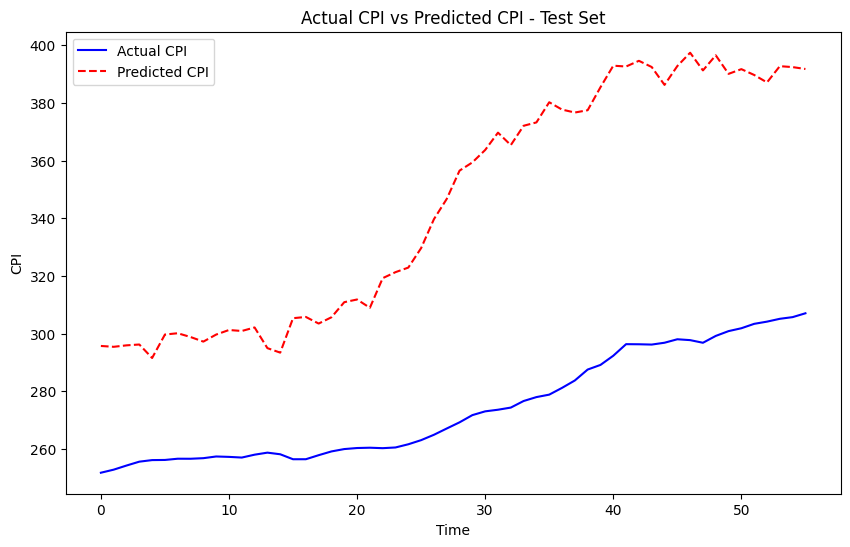

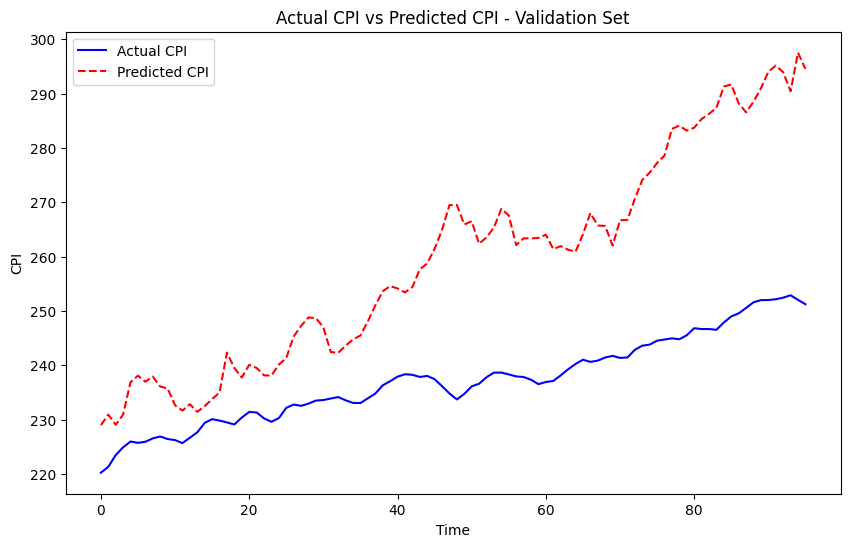

In [51]:
# Plotting Actual CPI and Predicted CPI for Test Set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual CPI', color='blue')
plt.plot(y_pred_test, label='Predicted CPI', linestyle='dashed', color='red')
plt.title('Actual CPI vs Predicted CPI - Test Set')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.show()

# Plotting Actual CPI and Predicted CPI for Validation Set
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual CPI', color='blue')
plt.plot(y_pred_val, label='Predicted CPI', linestyle='dashed', color='red')
plt.title('Actual CPI vs Predicted CPI - Validation Set')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.show()


In [52]:
# Polynomial regression degree
degree = 2  # Change the degree as needed

# Polynomial features transformation
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_val_poly = poly.transform(X_val)

# Create and fit a Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_test = poly_model.predict(X_test_poly)

# Predict on the validation set
y_pred_val = poly_model.predict(X_val_poly)



In [53]:
# Calculate RMSE for the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
# Calculate adjusted R-squared for the validation set
n_test = len(y_test)
p_test = X_test_poly.shape[1]
adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)

# Calculate RMSE for the validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)
# Calculate adjusted R-squared for the validation set
n_val = len(y_val)
p_val = X_val_poly.shape[1]
adj_r2_val = 1 - (1 - r2_val) * (n_val - 1) / (n_val - p_val - 1)

print("Test Set:")
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R-squared:", r2_test)

print("\nValidation Set:")
print("RMSE:", rmse_val)
print("MAE:", mae_val)
print("R-squared:", r2_val)
print("Adjusted R-squared:", adj_r2_val)

Test Set:
RMSE: 181.66414439473547
MAE: 166.4503723630871
R-squared: -97.00458146453545

Validation Set:
RMSE: 44.04809324954543
MAE: 33.151494959534794
R-squared: -29.538680283072456
Adjusted R-squared: -35.26468283614854


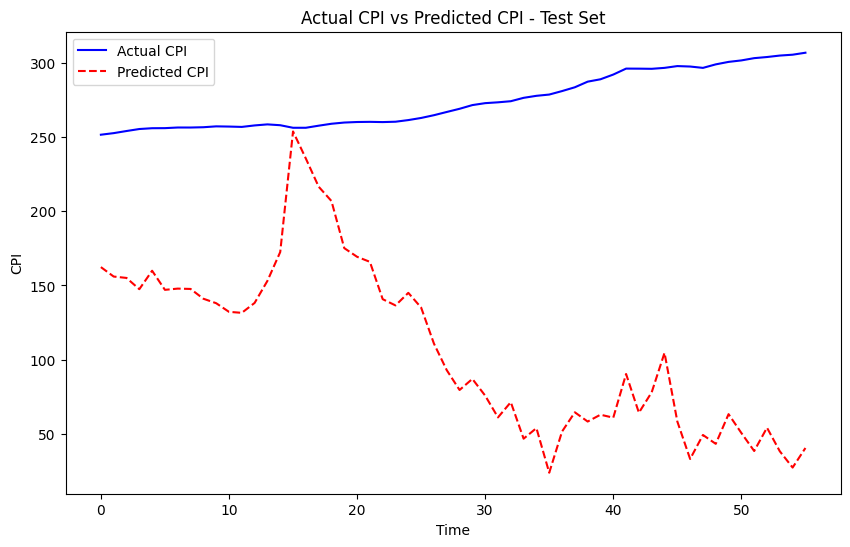

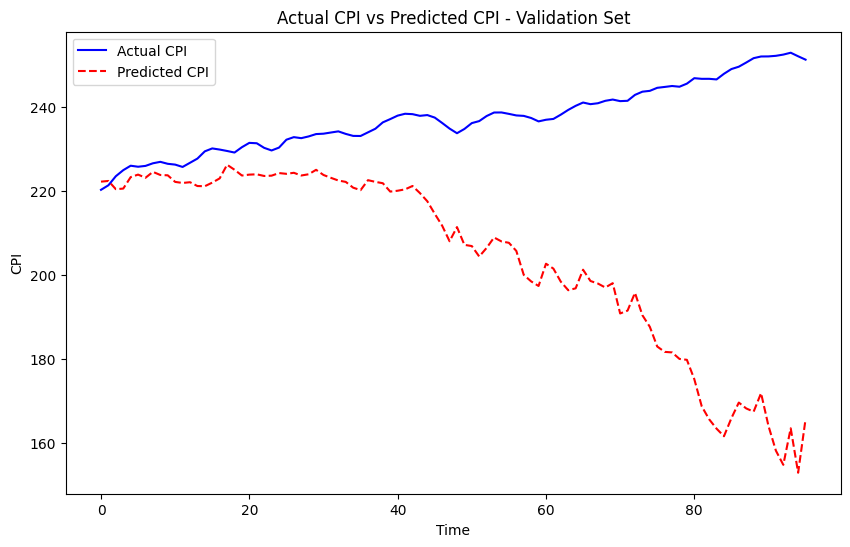

In [54]:
# Plotting Actual CPI and Predicted CPI for Test Set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual CPI', color='blue')
plt.plot(y_pred_test, label='Predicted CPI', linestyle='dashed', color='red')
plt.title('Actual CPI vs Predicted CPI - Test Set')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.show()

# Plotting Actual CPI and Predicted CPI for Validation Set
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual CPI', color='blue')
plt.plot(y_pred_val, label='Predicted CPI', linestyle='dashed', color='red')
plt.title('Actual CPI vs Predicted CPI - Validation Set')
plt.xlabel('Time')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [57]:
import warnings
from google.colab import files
uploaded = files.upload()

Saving deseasonized_training.csv to deseasonized_training.csv


In [58]:
de_training_data = pd.read_csv('deseasonized_training.csv')
print(de_training_data.head())
print(de_training_data.tail())
data_describe = de_training_data.drop(columns=['Year'])
print(data_describe.describe())

   Year    Label  CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  1980  1980 01  NaN                NaN              NaN              NaN   
1  1980  1980 02  NaN                NaN              NaN              NaN   
2  1980  1980 03  NaN                NaN              NaN              NaN   
3  1980  1980 04  NaN                NaN              NaN              NaN   
4  1980  1980 05  NaN                NaN              NaN              NaN   

   PPI  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
     Year    Label    CPI  Unemployment rate  DJI Index Close  \
367  2010  2010 08  2.478               -0.1           518.44   
368  2010  2010 09  2.470               -0.3          1075.77   
369  2010  2010 10  2.534               -0.5          1405.76   
370  2010  2010 11  2.473               -0.1           661.22   
371  2010  2010 12  3.230               -0.6          1149.51   

     Crude Oil Price   PPI  
367             4.20   9.9  
368             7.77  10.8  

In [59]:
import warnings
from google.colab import files
uploaded = files.upload()

Saving deseasonized_test.csv to deseasonized_test.csv


In [ ]:
de_test_data = pd.read_csv('deseasonized_test.csv')
print(de_test_data.head())
print(de_test_data.tail())
data_describe = de_test_data.drop(columns=['Year'])
print(data_describe.describe())

   Year    Label  CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  2019  2019 01  NaN                NaN              NaN              NaN   
1  2019  2019 02  NaN                NaN              NaN              NaN   
2  2019  2019 03  NaN                NaN              NaN              NaN   
3  2019  2019 04  NaN                NaN              NaN              NaN   
4  2019  2019 05  NaN                NaN              NaN              NaN   

   PPI  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
    Year    Label     CPI  Unemployment rate  DJI Index Close  \
51  2023  2023 04  14.254               -0.2          1124.25   
52  2023  2023 05  11.831                0.0           -81.85   
53  2023  2023 06   8.798                0.0          3632.17   
54  2023  2023 07   9.415                0.0          2714.40   
55  2023  2023 08  10.855                0.1          3211.48   

    Crude Oil Price     PPI  
51           -20.95  -8.402  
52           -35.98 -19.50

In [60]:
import warnings
from google.colab import files
uploaded = files.upload()

Saving deseasonized_validation.csv to deseasonized_validation.csv


In [ ]:
de_validation_data = pd.read_csv('deseasonized_validation.csv')
print(de_validation_data.head())
print(de_validation_data.tail())
data_describe = de_validation_data.drop(columns=['Year'])
print(data_describe.describe())

   Year    Label  CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  2011  2011 01  NaN                NaN              NaN              NaN   
1  2011  2011 02  NaN                NaN              NaN              NaN   
2  2011  2011 03  NaN                NaN              NaN              NaN   
3  2011  2011 04  NaN                NaN              NaN              NaN   
4  2011  2011 05  NaN                NaN              NaN              NaN   

   PPI  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN  
    Year    Label    CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
91  2018  2018 08  6.627               -0.6          4016.72            21.14   
92  2018  2018 09  5.620               -0.5          4053.22            22.41   
93  2018  2018 10  6.222               -0.4          1738.52            21.81   
94  2018  2018 11  5.369               -0.4          1266.11             2.39   
95  2018  2018 12  4.709               -0.2         -1391.76            

In [55]:
# Define the columns you want to deseasonalize
factors_col = ["CPI", "Unemployment rate", "DJI Index Close", "Crude Oil Price", "PPI"]

In [62]:
# Load deseasonalized datasets
deseasonized_training = pd.read_csv('deseasonized_training.csv')
deseasonized_test = pd.read_csv('deseasonized_test.csv')
deseasonized_validation = pd.read_csv('deseasonized_validation.csv')

# Remove rows with NaN values in the deseasonalized datasets
deseasonized_training.dropna(inplace=True)
deseasonized_test.dropna(inplace=True)
deseasonized_validation.dropna(inplace=True)

In [63]:
# Perform linear regression without handling NaN values
# Assuming 'CPI' is the target variable and 'year', 'Label' are additional features
features = ['Unemployment rate', 'DJI Index Close', 'Crude Oil Price', 'PPI']
target = 'CPI'

In [64]:
# Training set
X_train = deseasonized_training[features]
y_train = deseasonized_training[target]

# Test set
X_test = deseasonized_test[features]
y_test = deseasonized_test[target]

# Validation set
X_val = deseasonized_validation[features]
y_val = deseasonized_validation[target]


In [71]:
## First try moving average

# convert it to a datetime object
deseasonized_training['Label'] = pd.to_datetime(deseasonized_training['Label'])
deseasonized_test['Label'] = pd.to_datetime(deseasonized_test['Label'])
deseasonized_validation['Label'] = pd.to_datetime(deseasonized_validation['Label'])

# Calculate moving average for the 'CPI' column (change column name as needed)
window_size = 5  # Define your window size
deseasonized_training['Moving_Avg'] = deseasonized_training['CPI'].rolling(window=window_size).mean()
deseasonized_test['Moving_Avg'] = deseasonized_test['CPI'].rolling(window=window_size).mean()
deseasonized_validation['Moving_Avg'] = deseasonized_validation['CPI'].rolling(window=window_size).mean()

# Use the moving average as your prediction and compare it with the actual 'CPI' values
# Example: Calculate Root Mean Squared Error (RMSE)
test_rmse = np.sqrt(((deseasonized_test['CPI'] - deseasonized_test['Moving_Avg']) ** 2).mean())
validation_rmse = np.sqrt(((deseasonized_validation['CPI'] - deseasonized_validation['Moving_Avg']) ** 2).mean())


print("Test Set RMSE:", test_rmse)
print("Validation Set RMSE:", validation_rmse)

Test Set RMSE: 2.3016950201970685
Validation Set RMSE: 0.8407826698975187


In [72]:
mask_test = ~np.isnan(deseasonized_test['Moving_Avg'])
y_test = deseasonized_test['CPI'][mask_test]
y_pred_test = deseasonized_test['Moving_Avg'][mask_test]

# Calculate Mean Absolute Error (MAE)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Calculate R-squared
test_r2 = r2_score(y_test, y_pred_test)

# Calculate Adjusted R-squared
n_test = len(y_test)
p_test = 1

test_adjusted_r2 = 1 - (1 - test_r2) * (n_test - 1) / (n_test - p_test - 1)

print("Test Set MAE:", test_mae)
print("Test Set R-squared:", test_r2)
print("Test Set Adjusted R-squared:", test_adjusted_r2)

Test Set MAE: 1.8848299999999978
Test Set R-squared: 0.902132457827971
Test Set Adjusted R-squared: 0.899556996191865


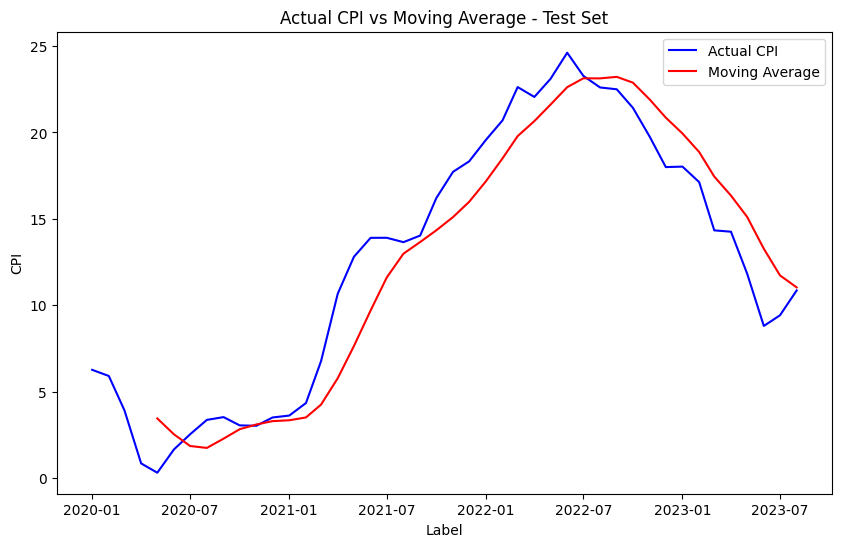

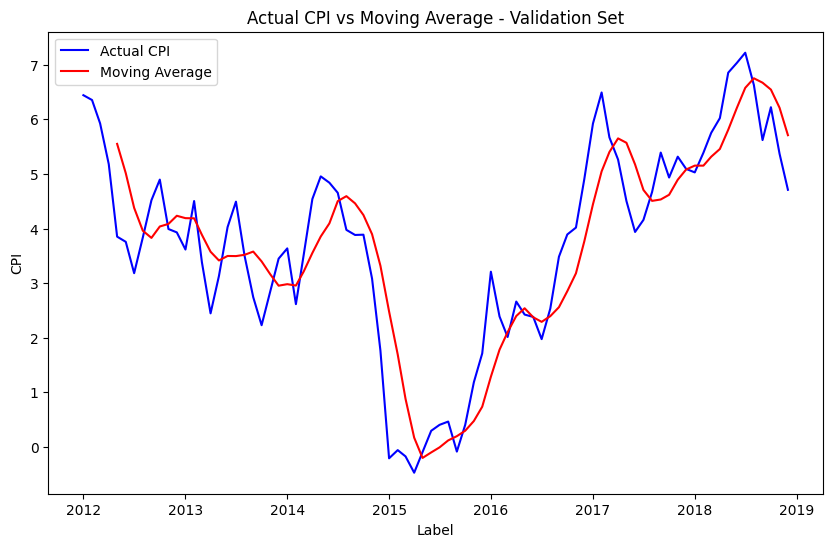

In [73]:
# Plotting CPI and Moving Average for Test Set
plt.figure(figsize=(10, 6))
plt.plot(deseasonized_test['Label'], deseasonized_test['CPI'], label='Actual CPI', color='blue')
plt.plot(deseasonized_test['Label'], deseasonized_test['Moving_Avg'], label='Moving Average', color='red')
plt.title('Actual CPI vs Moving Average - Test Set')
plt.xlabel('Label')
plt.ylabel('CPI')
plt.legend()
plt.show()

# Plotting CPI and Moving Average for Validation Set
plt.figure(figsize=(10, 6))
plt.plot(deseasonized_validation['Label'], deseasonized_validation['CPI'], label='Actual CPI', color='blue')
plt.plot(deseasonized_validation['Label'], deseasonized_validation['Moving_Avg'], label='Moving Average', color='red')
plt.title('Actual CPI vs Moving Average - Validation Set')
plt.xlabel('Label')
plt.ylabel('CPI')
plt.legend()
plt.show()

In [65]:
# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using the model
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)


In [66]:
# Calculate metrics
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_val = mean_absolute_error(y_val, y_pred_val)

r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)

# Adjusted R-squared calculation (for the validation set)
n = len(X_test)
p = len(features)  # Number of predictors
adj_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

# Adjusted R-squared calculation (for the validation set)
n = len(X_val)
p = len(features)  # Number of predictors
adj_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)

# Print the metrics
print("Test Set Metrics:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R-squared: {r2_test}")
print(f"Adjusted R-squared: {adj_r2_test}")

print("\nValidation Set Metrics:")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R-squared: {r2_val}")
print(f"Adjusted R-squared: {adj_r2_val}")

Test Set Metrics:
RMSE: 6.904922031941933
MAE: 5.376985691244217
R-squared: 0.1549534897481335
Adjusted R-squared: 0.06828205279922406

Validation Set Metrics:
RMSE: 0.7564752456711146
MAE: 0.6188944299306188
R-squared: 0.840410335533821
Adjusted R-squared: 0.8323298461937614


In [67]:
# Get the coefficients and intercept of the linear regression model
coefficients = model.coef_
intercept = model.intercept_
# Print out the regression formula
print("Regression Formula:")
print("CPI = ", end="")
for i, feature in enumerate(features):
    print(f"({coefficients[i]:.2f} * {feature}) + ", end="")
print(f"{intercept:.2f}")

Regression Formula:
CPI = (0.20 * Unemployment rate) + (-0.00 * DJI Index Close) + (0.00 * Crude Oil Price) + (0.26 * PPI) + 3.72


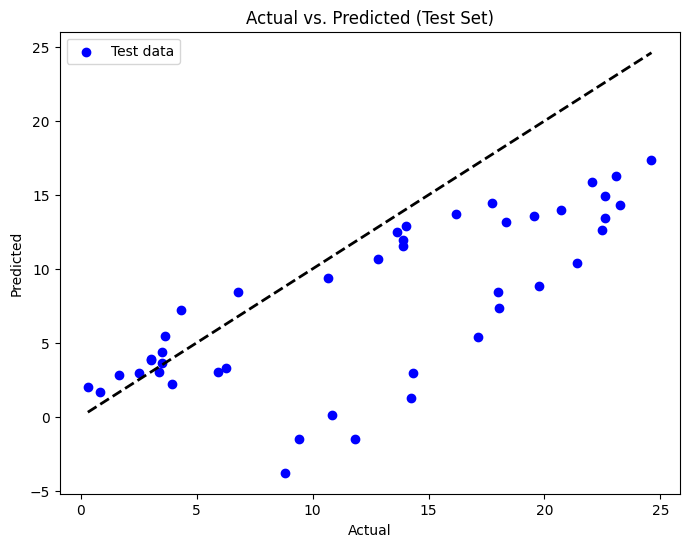

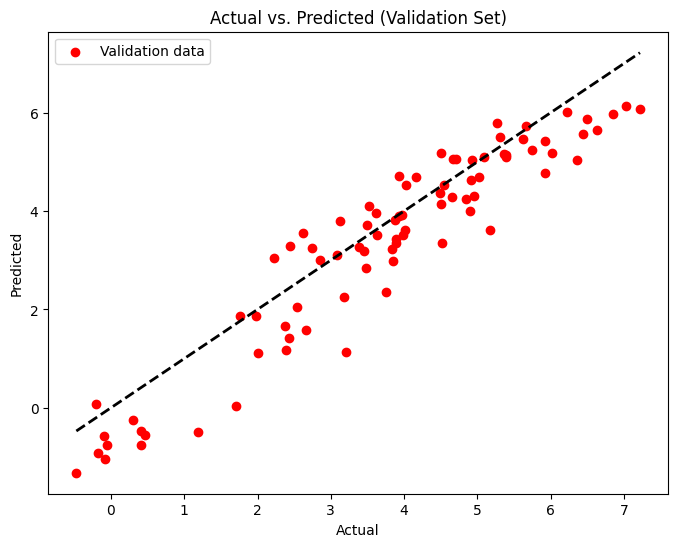

In [68]:
# Plotting for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Test data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Plotting for the validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, color='red', label='Validation data')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Validation Set)')
plt.legend()
plt.show()


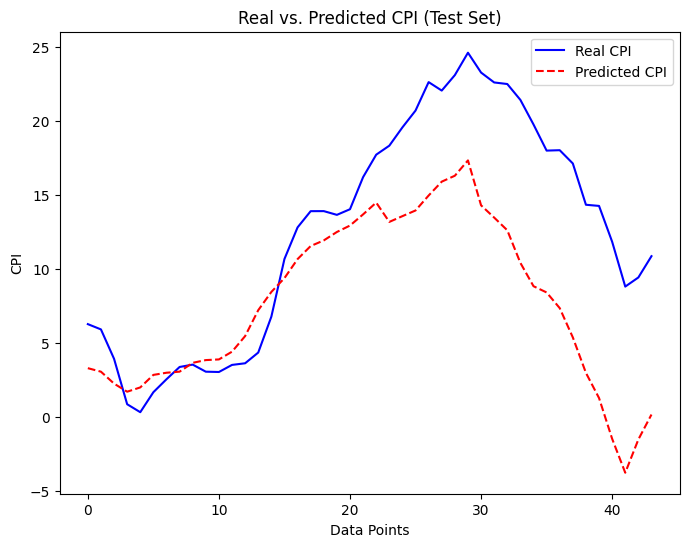

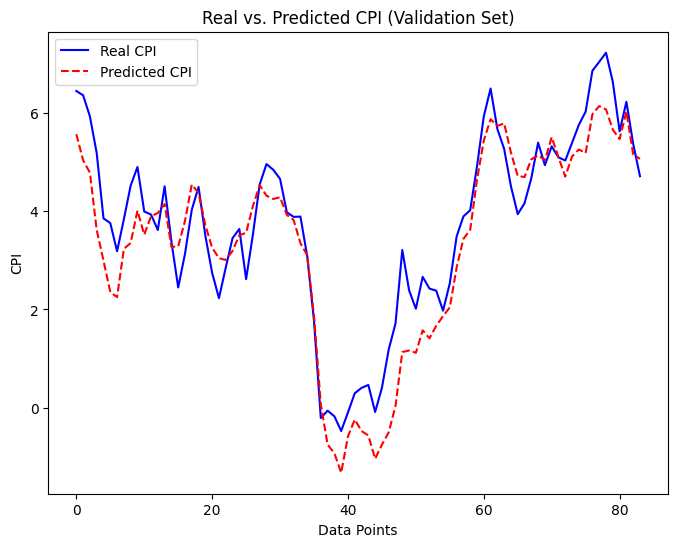

In [69]:
# Plotting for the test set
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Real CPI', color='blue')
plt.plot(y_pred_test, label='Predicted CPI', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('CPI')
plt.title('Real vs. Predicted CPI (Test Set)')
plt.legend()
plt.show()

# Plotting for the validation set
plt.figure(figsize=(8, 6))
plt.plot(y_val.values, label='Real CPI', color='blue')
plt.plot(y_pred_val, label='Predicted CPI', color='red', linestyle='--')
plt.xlabel('Data Points')
plt.ylabel('CPI')
plt.title('Real vs. Predicted CPI (Validation Set)')
plt.legend()
plt.show()


In [ ]:
# Polynomial regression degree
degree = 2  # Change the degree as needed

# Polynomial features transformation
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_val_poly = poly.transform(X_val)

# Create and fit a Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred_test = poly_model.predict(X_test_poly)

# Predict on the validation set
y_pred_val = poly_model.predict(X_val_poly)

In [ ]:
# Calculate metrics
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_val = mean_absolute_error(y_val, y_pred_val)

r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)

# Adjusted R-squared calculation (for the validation set)
n = len(X_val)
p = len(features)  # Number of predictors
adj_r2_val = 1 - (1 - r2_val) * (n - 1) / (n - p - 1)

# Print the metrics
print("Test Set Metrics:")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")
print(f"R-squared: {r2_test}")

print("\nValidation Set Metrics:")
print(f"RMSE: {rmse_val}")
print(f"MAE: {mae_val}")
print(f"R-squared: {r2_val}")
print(f"Adjusted R-squared: {adj_r2_val}")

Test Set Metrics:
RMSE: 14.602240419224797
MAE: 12.739700957915847
R-squared: -2.7792188645335303

Validation Set Metrics:
RMSE: 2.222084913203672
MAE: 1.6425025745619708
R-squared: -0.3770084997577461
Adjusted R-squared: -0.44673044911256876


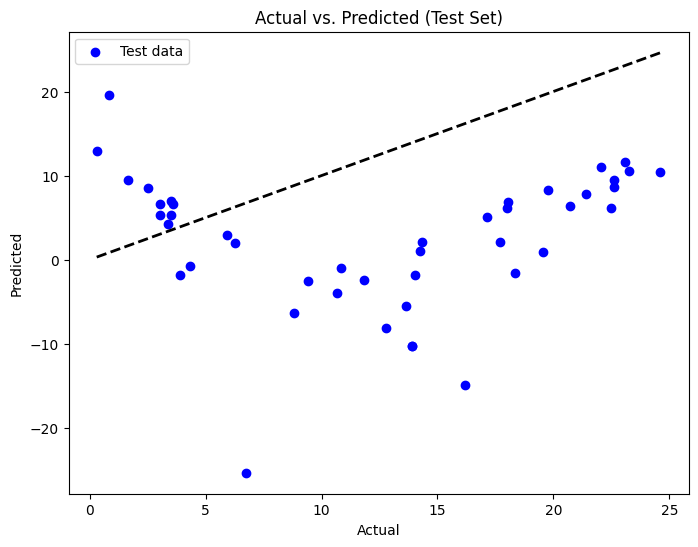

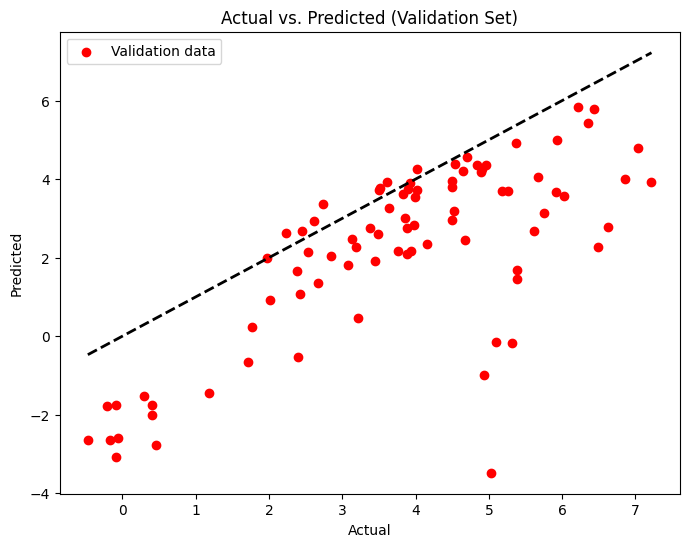

In [ ]:
# Plotting for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Test data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Test Set)')
plt.legend()
plt.show()

# Plotting for the validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val, color='red', label='Validation data')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Validation Set)')
plt.legend()
plt.show()

In [ ]:
# Create and fit a Locally Weighted Regression model
lwr_model = KNeighborsRegressor(weights='distance')

# Fit the model
lwr_model.fit(X_train, y_train)

# Predict CPI using Locally Weighted Regression
y_pred_test_lwr = lwr_model.predict(X_test)
y_pred_val_lwr = lwr_model.predict(X_val)

# Calculate RMSE and MAE for the test set
test_rmse_lwr = mean_squared_error(y_test, y_pred_test_lwr, squared=False)
test_mae_lwr = mean_absolute_error(y_test, y_pred_test_lwr)
r2_test_lwr = r2_score(y_test, y_pred_test_lwr)

# Calculate RMSE and MAE for the validation set
validation_rmse_lwr = mean_squared_error(y_val, y_pred_val_lwr, squared=False)
validation_mae_lwr = mean_absolute_error(y_val, y_pred_val_lwr)
r2_val_lwr = r2_score(y_val, y_pred_val_lwr)

# Calculate adjusted R-squared for the validation set
n = len(X_val)
p = len(features)  # Number of predictors
adj_r2_val_lwr = 1 - (1 - r2_val_lwr) * (n - 1) / (n - p - 1)

print("Locally Weighted Regression - Test Set")
print("RMSE:", test_rmse_lwr)
print("MAE:", test_mae_lwr)
print("R-squared:", r2_test_lwr)

print("\nLocally Weighted Regression - Validation Set")
print("RMSE:", validation_rmse_lwr)
print("MAE:", validation_mae_lwr)
print("R-squared:", r2_val_lwr)
print("Adjusted R-squared:", adj_r2_val_lwr)

Locally Weighted Regression - Test Set
RMSE: 11.426324115659542
MAE: 9.072451953098518
R-squared: -1.3140680837173893

Locally Weighted Regression - Validation Set
RMSE: 1.9282924137386743
MAE: 1.5513433274516997
R-squared: -0.03695785279297592
Adjusted R-squared: -0.08946204787110124


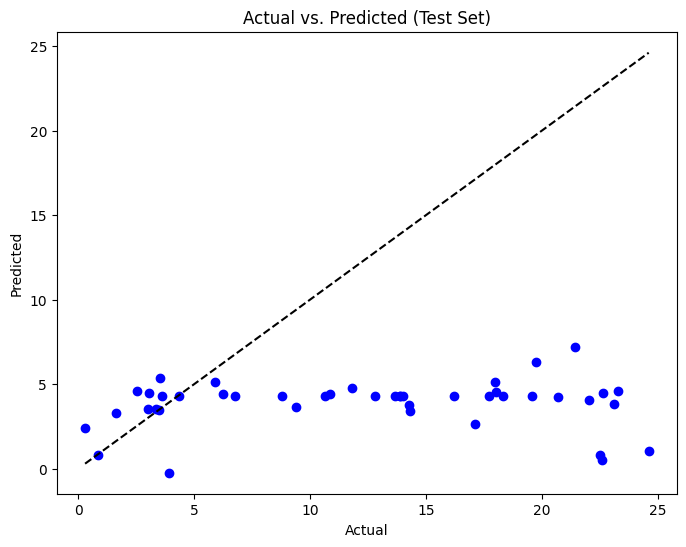

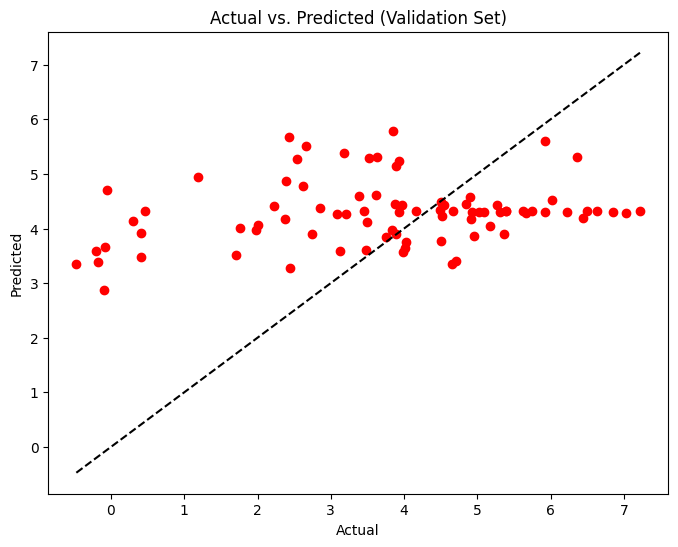

In [ ]:
# Plot actual vs. predicted for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_lwr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Test Set)')
plt.show()

# Plot actual vs. predicted for validation set
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_val_lwr, color='red')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Validation Set)')
plt.show()

In [ ]:
import warnings
from google.colab import files
uploaded = files.upload()

Saving CPI & factors dataset (vr.3).csv to CPI & factors dataset (vr.3).csv


In [ ]:
data = pd.read_csv('CPI & factors dataset (vr.3).csv')
print(data.head())
print(data.tail())
data_describe = data.drop(columns=['Year'])
print(data_describe.describe())

   Year    Label   CPI  Unemployment rate  DJI Index Close  Crude Oil Price  \
0  1980  1980 01  77.8                6.9            875.9            39.00   
1  1980  1980 02  78.9                6.8            863.1            37.25   
2  1980  1980 03  80.1                6.6            785.8            37.00   
3  1980  1980 04  81.0                6.7            817.1            36.58   
4  1980  1980 05  81.8                7.1            850.9            37.05   

    PPI  
0  85.2  
1  86.9  
2  87.5  
3  87.8  
4  88.3  
     Year    Label      CPI  Unemployment rate  DJI Index Close  \
519  2023  2023 04  303.363                3.1         34101.46   
520  2023  2023 05  304.127                3.4         32908.27   
521  2023  2023 06  305.109                3.8         34407.60   
522  2023  2023 07  305.691                3.8         35559.53   
523  2023  2023 08  307.026                3.9         34721.91   

     Crude Oil Price      PPI  
519            82.46  256.908 

In [ ]:
X = data[features]
y = data[target]

# Initialize Time Series Split (considering temporal order)
tscv = TimeSeriesSplit(n_splits=5)  # Number of splits (adjust as needed)

# Initialize the multiple regression model
model = LinearRegression()

# Lists to store performance metrics
mse_list = []

# Perform k-fold cross-validation with time series-aware splitting
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate performance metric (MSE for example)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calculate and print the average performance metric across folds
average_mse = sum(mse_list) / len(mse_list)
print(f"Average MSE across folds: {average_mse}")


Average MSE across folds: 593.3879236207179


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Display the calculated metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

RMSE: 43.0057238226354
MAE: 37.176161485913276
R-squared: -3.6225287565837627
Adjusted R-squared: -3.848017964221995


In [ ]:
X = data[features]
y = data[target]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict CPI on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = len(y_test)
p = X_test.shape[1]  # Number of predictors (features)
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate Mean Absolute Scaled Error (MASE) assuming a naive forecast (e.g., simple rolling mean)
naive_error = np.mean(np.abs(y_test[1:] - y_test[:-1]))
mase = mae / naive_error

# Display the calculated metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"MAPE: {mape}")
print(f"MASE: {mase}")


RMSE: 10.592899903698788
MAE: 8.392563707523687
R-squared: 0.9703867865848217
Adjusted R-squared: 0.9698089677864767
MAPE: 5.593055244429524
MASE: inf


<ipython-input-54-2274d04830f2>:33: RuntimeWarning: divide by zero encountered in double_scalars
  mase = mae / naive_error


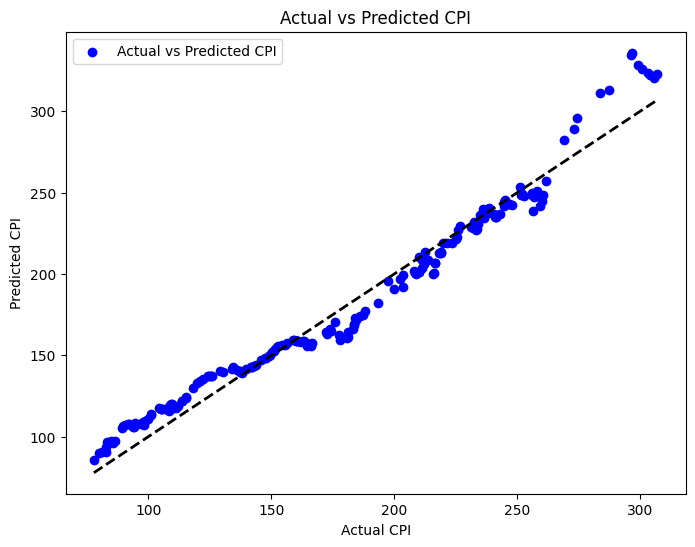

In [ ]:
# Plotting the actual vs. predicted CPI values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted CPI')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual CPI')
plt.ylabel('Predicted CPI')
plt.title('Actual vs Predicted CPI')
plt.legend()
plt.show()


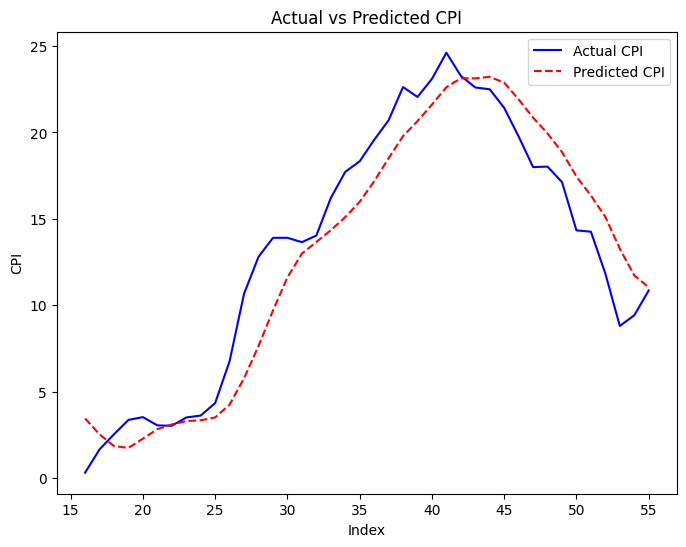

In [74]:
# Plotting the actual CPI values as a curve
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual CPI', color='blue')

# Plotting the predicted CPI values as a curve
plt.plot(y_pred_test, label='Predicted CPI', color='red', linestyle='dashed')

plt.xlabel('Index')
plt.ylabel('CPI')
plt.title('Actual vs Predicted CPI')
plt.legend()
plt.show()